In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style"))
             
from starkiller import *
import matplotlib.pyplot as plt
%matplotlib notebook

from mpl_toolkits.axes_grid1 import make_axes_locatable

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

fig_width_pt = 240.0  # Get this from LaTeX using \showthe\columnwidth
inches_per_pt = 1.0/72.27               # Convert pt to inches
golden_mean = (np.sqrt(5)-1.0)/2.0         # Aesthetic ratio
fig_width = fig_width_pt*inches_per_pt  # width in inches

import matplotlib.patches as mpatches

In [118]:
moffat.header0

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                    8 / number of bits per data pixel                  
NAXIS   =                    0 / number of data axes                            
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
DATE    = '2023-09-27T15:00:52' / file creation date (YYYY-MM-DDThh:mm:ss UT)   
ORIGIN  = 'ESO-PARANAL'        / European Southern Observatory                  
TELESCOP= 'ESO-VLT-U4'         / ESO <TEL>                                      
INSTRUME= 'MUSE    '           / Instrument used.                               
RA      =     276.426913637073 / [deg] Image center (J2000)                     
DEC     =    -23.1778732887245 / [deg] Image center (J2000)                     
EQUINOX =                200

In [2]:
moffat = starkiller(file='../ADP.2023-09-27T15_07_36.629_stars.fits',trail=False,run=True,numcores=7,spec_catalog='ck',psf_profile='moffat',plot=False,psf_preference='model',calc_psf_only=True)
gaussian = starkiller(file='../ADP.2023-09-27T15_07_36.629_stars.fits',trail=False,run=True,numcores=7,spec_catalog='ck',psf_profile='gaussian',plot=False,psf_preference='model',calc_psf_only=True)
data = starkiller(file='../ADP.2023-09-27T15_07_36.629_stars.fits',trail=False,run=True,numcores=7,spec_catalog='ck',psf_profile='gaussian',plot=False,calc_psf_only=True)



Number of sources brighter than 25: 700
wcs shift:  [ 2.77777778e-04 -9.66666667e+00  0.00000000e+00]
Coords transformed
Calculating PSF coord shift
PSF shift:  [-4.25536577 -0.42178734  0.        ]
Made PSF
Exiting
Number of sources brighter than 25: 700
wcs shift:  [ 2.77777778e-04 -9.66666667e+00  0.00000000e+00]
Coords transformed
Calculating PSF coord shift
PSF shift:  [-4.25536577 -0.42178734  0.        ]
Made PSF
Exiting
Number of sources brighter than 25: 700
wcs shift:  [ 2.77777778e-04 -9.66666667e+00  0.00000000e+00]
Coords transformed
Calculating PSF coord shift
PSF shift:  [-4.25536577 -0.42178734  0.        ]
!!! Large difference of 0.23 between model_psf and data_psf!!!
Using the data_psf, override by setting psf_preference='model'
Made PSF
Exiting


<IPython.core.display.Javascript object>


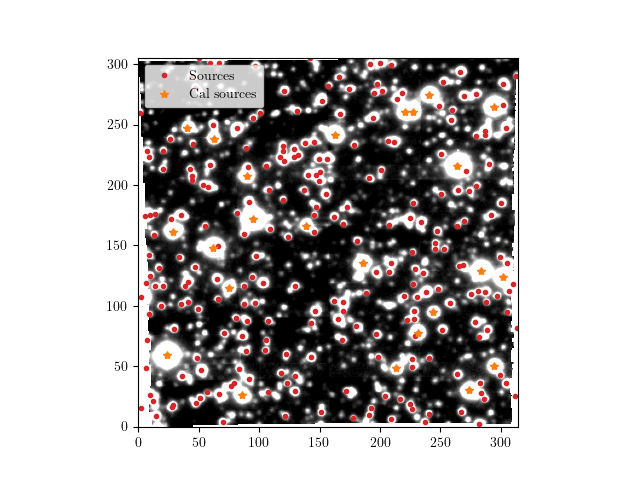

In [3]:
data.plot_cal_sources()

<IPython.core.display.Javascript object>


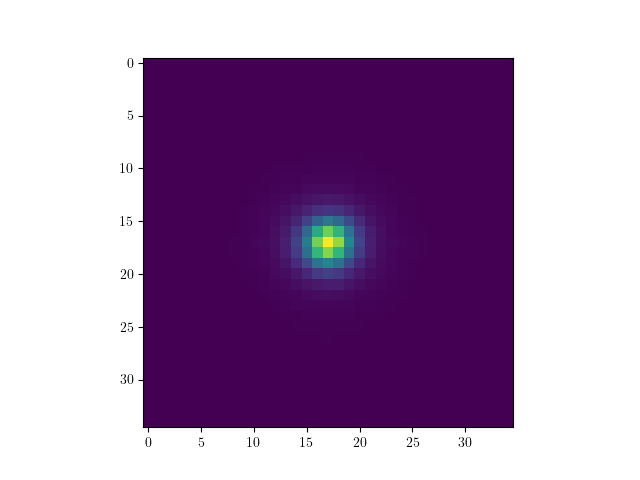

In [4]:
plt.figure()
plt.imshow(data.psf.data_psf)

In [88]:
i = 0
data.psf.fit_pos(data.cal_cuts[i])
data_f,data_r = data.psf.psf_flux(data.cal_cuts[i])

gaussian.psf.fit_pos(data.cal_cuts[i])
gauss_f, gauss_r = gaussian.psf.psf_flux(data.cal_cuts[i])


moffat.psf.fit_pos(data.cal_cuts[i])
moffat_f, moffat_r = moffat.psf.psf_flux(data.cal_cuts[i])


j = 7
data.psf.fit_pos(data.cal_cuts[j])
data_f2,data_r2 = data.psf.psf_flux(data.cal_cuts[j])

gaussian.psf.fit_pos(data.cal_cuts[j])
gauss_f2, gauss_r2 = gaussian.psf.psf_flux(data.cal_cuts[j])


moffat.psf.fit_pos(data.cal_cuts[j])
moffat_f2, moffat_r2 = moffat.psf.psf_flux(data.cal_cuts[j])

In [23]:
moffat.cat.iloc[i]

_q                               1
ra                      276.434685
dec                     -23.182469
id             4089517196168647168
e_RA_ICRS                   0.0302
                      ...         
xint                            24
yint                            59
fuzz                             0
cal_source                       1
containment               0.999998
Name: 153, Length: 66, dtype: object

In [67]:
from astropy.visualization import simple_norm

<IPython.core.display.Javascript object>


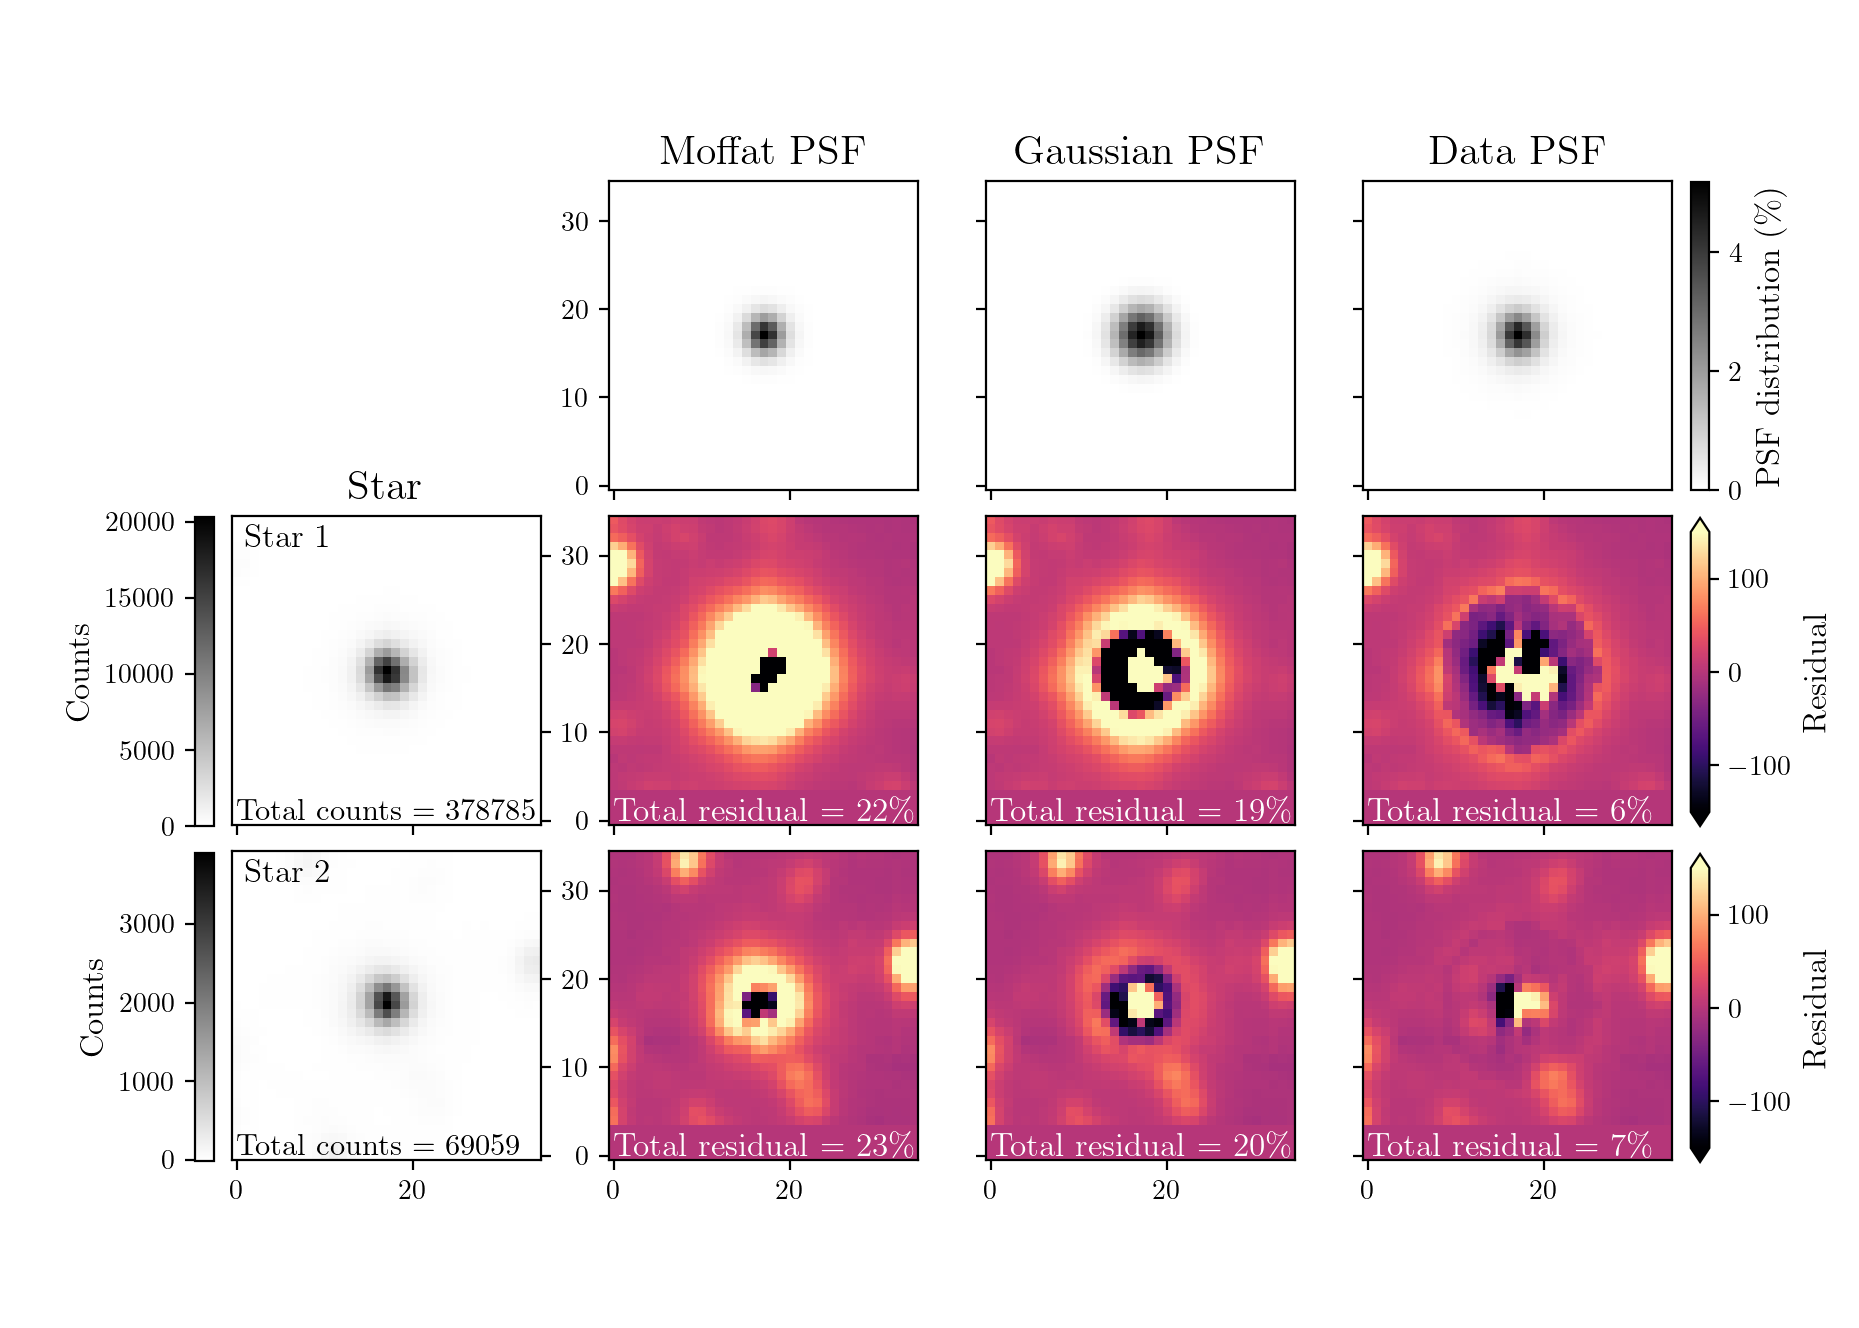

In [117]:
star1_ind = (data.psf.longpsf.T*100) > 0.05

fig, axs = plt.subplot_mosaic('''
                               ABCD
                               EFGH
                               IJKL
                               ''',
                              figsize=(1.4*fig_width*2,2*fig_width))
#plt.tight_layout()
axs['A'].axis('off')

axs['B'].set_title('Moffat PSF',fontsize=15)
axs['B'].imshow(moffat.psf.longpsf.T,origin='lower',cmap='gray_r')

axs['C'].set_title('Gaussian PSF',fontsize=15)
axs['C'].imshow(gaussian.psf.longpsf.T,origin='lower',cmap='gray_r')

axs['D'].set_title('Data PSF',fontsize=15)

datpsf = axs['D'].imshow(data.psf.longpsf.T*100,origin='lower',cmap='gray_r')


axs['E'].set_title('Star',fontsize=15)
star1 = axs['E'].imshow(data.cal_cuts[i].T,origin='lower',cmap='gray_r')
star1_counts = np.nansum(data.cal_cuts[i].T[star1_ind])
axs['E'].text(0,0,s=r'Total counts $=$ '+str(int(np.nansum(data.cal_cuts[i].T[star1_ind]))),fontsize=11)
#axs['E'].text(0,28,s='G '+str(data.cals.id.iloc[i]),fontsize=10)
axs['E'].text(1,31,s='Star 1',fontsize=12)

#fig.colorbar(star1,ax=axs['E'])
#divider = make_axes_locatable(axs['E'])
#cax = divider.append_axes('right', size='5%', pad=0.05,)
#fig.colorbar(star1, cax=cax, orientation='vertical',);
cb_ax = fig.add_axes([.105,.124+0.254,.01,.233])
col = plt.colorbar(star1,orientation='vertical',cax=cb_ax)
col.ax.set_ylabel('Counts',fontsize=12)
col.ax.yaxis.set_label_position("left")
col.ax.yaxis.set_ticks_position('left')


s1max = 150#np.nanpercentile(moffat_r,99)
s1min = -150#np.nanpercentile(moffat_r,16)

a = deepcopy(moffat_r.T)
a[:4,:] = 0
axs['F'].imshow(a,origin='lower',vmin=s1min,vmax=s1max,cmap='magma')
axs['F'].text(0,0,s=r'Total residual $=$ '+str(int(np.round(np.nansum(abs(moffat_r.T[star1_ind])/star1_counts * 100))))+r'\%',color='white',weight=1000,fontsize=12)

a = deepcopy(gauss_r.T)
a[:4,:] = 0
axs['G'].imshow(a,origin='lower',vmin=s1min,vmax=s1max,cmap='magma')
axs['G'].text(0,0,s=r'Total residual $=$ ' +str(int(np.round(np.nansum(abs(gauss_r.T[star1_ind])/star1_counts * 100))))+r'\%',color='white',weight=1000,fontsize=12)

a = deepcopy(data_r.T)
a[:4,:] = 0
data1 = axs['H'].imshow(a,origin='lower',vmin=s1min,vmax=s1max,cmap='magma')
axs['H'].text(0,0,s=r'Total residual $=$ ' +str(int(np.round(np.nansum(abs(data_r.T[star1_ind])/star1_counts * 100))))+r'\%',color='white',weight=1000,fontsize=12)
#divider = make_axes_locatable(axs['H'])
#cax = divider.append_axes('right', size='5%', pad=0.05)
#fig.colorbar(data1, cax=cax, orientation='vertical',extend='both');
cb_ax = fig.add_axes([.91,.124+.254,.01,.232])
col = fig.colorbar(data1,orientation='vertical',cax=cb_ax,extend='both')
col.ax.set_ylabel('Residual',fontsize=12)

norm = simple_norm(data.cal_cuts[j], 'sqrt')
star2 = axs['I'].imshow(data.cal_cuts[j].T,origin='lower',cmap='gray_r')
star2_counts = np.nansum(data.cal_cuts[j].T[star1_ind])
axs['I'].text(0,0,s=r'Total counts $=$ '+str(int(star2_counts)),fontsize=11)
#axs['I'].text(0,28,s='G '+str(data.cals.id.iloc[j]),fontsize=10)
axs['I'].text(1,31,s='Star 2',fontsize=12)

#divider = make_axes_locatable(axs['I'])
#cax = divider.append_axes('right', size='5%', pad=0.05)
#fig.colorbar(star2, cax=cax, orientation='vertical');
cb_ax = fig.add_axes([.105,.126,.01,.232])
col = plt.colorbar(star2,orientation='vertical',cax=cb_ax,)
col.ax.set_ylabel('Counts',fontsize=12)
col.ax.yaxis.set_label_position("left")
col.ax.yaxis.set_ticks_position('left')

#col.ax.tick_params(left=True,labelleft=True,right=False,labelright=False,)

s2max = 150#np.nanpercentile(moffat_r,99)
s2min = -150#np.nanpercentile(moffat_r,16)
a = deepcopy(moffat_r2.T)
a[:4,:] = 0
axs['J'].imshow(a,origin='lower',vmin=s2min,vmax=s2max,cmap='magma')
axs['J'].text(0,0,s=r'Total residual $=$ '+str(int(np.round(np.nansum(abs(moffat_r2.T[star1_ind])/star2_counts * 100))))+r'\%',color='white',weight=1000,fontsize=12)

a = deepcopy(gauss_r2.T)
a[:4,:] = 0
axs['K'].imshow(a,origin='lower',vmin=s2min,vmax=s2max,cmap='magma')
axs['K'].text(0,0,s=r'Total residual $=$ ' + str(int(np.round(np.nansum(abs(gauss_r2.T[star1_ind])/star2_counts * 100))))+r'\%',color='white',weight=1000,fontsize=12)

a = deepcopy(data_r2.T)
a[:4,:] = 0
data2 = axs['L'].imshow(a,origin='lower',vmin=s2min,vmax=s2max,cmap='magma')
axs['L'].text(0,0,s=r'Total residual $=$ '+ str(int(np.round(np.nansum(abs(data_r2.T[star1_ind])/star2_counts * 100))))+r'\%',color='white',weight=1000,fontsize=12)
#divider = make_axes_locatable(axs['L'])
#cax = divider.append_axes('right', size='5%', pad=0.05)
#cb_ax = fig.add_axes([.91,.124,.04,.754])
cb_ax = fig.add_axes([.91,.125,.01,.232])
col = plt.colorbar(data2,orientation='vertical',cax=cb_ax,extend='both')
col.ax.set_ylabel('Residual',fontsize=12)

axs['K'].set_yticklabels([])

axs['L'].set_yticklabels([])
#axs['J'].set_yticklabels([])

axs['C'].set_yticklabels([])
axs['D'].set_yticklabels([])
axs['E'].set_yticklabels([])
#axs['F'].set_yticklabels([])
axs['G'].set_yticklabels([])
axs['H'].set_yticklabels([])
axs['I'].set_yticklabels([])


axs['B'].set_xticklabels([])
axs['C'].set_xticklabels([])
axs['D'].set_xticklabels([])
axs['E'].set_xticklabels([])
axs['F'].set_xticklabels([])
axs['G'].set_xticklabels([])
axs['H'].set_xticklabels([])


axs['E'].tick_params(left = False,right=True)
axs['I'].tick_params(left = False,right=True)

#axs['K'].set_xlabel(r'$x$ position (Pixel)',fontsize=15)


cb_ax = fig.add_axes([.91,.631,.01,.232])
col = plt.colorbar(datpsf,orientation='vertical',cax=cb_ax)
col.ax.set_ylabel('PSF distribution (\%)',fontsize=12)


rect=mpatches.Rectangle((0,0),100,100, 
                        fill=False,
                        color="Orange",
                       linewidth=2,
                       facecolor="red")
#axs['J'].add_patch(rect)

#ax3 = fig.add_subplot(111, facecolor="none")
#ax3.axis('off')
#ax3.
#fig.colorbar(data2, cax=cax, orientation='vertical',extend='both',);
plt.subplots_adjust(hspace=-0.05)
plt.subplots_adjust(wspace=0.22)


plt.savefig('PSF_example_residual_ps.pdf',bbox_inches='tight')


In [25]:
5055/69059

0.07319827973182351

In [15]:
gaussian.y_length

17

In [16]:
gaussian.x_length

17

In [18]:
data = starkiller(file='../2I_DATACUBE_FINAL_2019-12-31T06:22:04.886.fits',cal_maglim=20,run=True,numcores=7,spec_catalog='ck',psf_profile='gaussian',plot=False,calc_psf_only=True)


Number of sources brighter than 25: 7
WCS shift:  [10. 10.  0.]
wcs shift:  [3.02109375e+01 5.02994792e+01 9.24479167e-05]
Coords transformed
Calculating PSF coord shift
PSF shift:  [-0.91396742 -0.10669801  0.        ]
!!! Large difference of 0.23 between model_psf and data_psf!!!
Using the data_psf, override by setting psf_preference='model'
Made PSF
Exiting


In [120]:
from scipy.ndimage import rotate

In [121]:
boop = deepcopy(data.cal_cuts[0])
boop[np.isnan(boop)] = 0
cal1 = rotate(boop,data.psf_param[-1])

boop = deepcopy(data.cal_cuts[1])
boop[np.isnan(boop)] = 0
cal2 = rotate(boop,data.psf_param[-1])

gauss1 = deepcopy(data.psf.longpsf)
gauss1[np.isnan(gauss1)] = 0
gauss1 = rotate(gauss1,data.psf_param[-1])
d1 = rotate(data.psf.data_psf,data.psf_param[-1])

s1 = np.nansum(cal1[50:54],axis=0)     
s1 -= np.nanmedian(s1[3:10])
s2 = np.nansum(cal2[50:54],axis=0)
s2 -= np.nanmedian(s2[3:10])
gauss = np.nansum(gauss1[50:54],axis=0)
d = np.nansum(d1[50:54],axis=0)

s1 = s1 /np.median(s1[20:100])
s2 = s2 /np.median(s2[20:100])
gauss = gauss/np.median(gauss[20:100])
d = d/np.median(d[20:100])

#s1[s1<=0.1] = np.nan
#s2[s2<=0.1] = np.nan
s2[118:] = np.nan
s1[113:] = np.nan
s1[:4] = np.nan
s2[:4] = np.nan
gauss = gauss[2:]
d = d[2:]

<IPython.core.display.Javascript object>


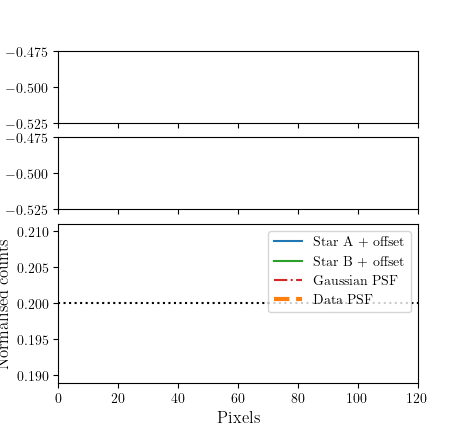

In [122]:
fig, axs = plt.subplot_mosaic('''
                               AA
                               BB
                               CC
                               CC
                               ''',
                              figsize=(1.4*fig_width,1*fig_width*1.3))
a = cal1[50-5:54+6]
a[a<.001] = np.nan
vmin = np.nanpercentile(a,16);vmax = np.nanpercentile(a,99)
axs['A'].imshow(a,origin='lower',vmin=vmin,vmax=vmax,cmap='viridis',aspect='auto')
#axs['A'].axhline(6.5,ls=':',c='w')
axs['A'].set_xlim(0,120)
axs['A'].set_xticklabels([])
axs['A'].set_ylabel('Pixels',fontsize=12)
axs['A'].text(5,11,s=r'Star A',color='white',weight=1000,fontsize=12)



b = cal2[50-5:54+6]
vmin = np.nanpercentile(b,16);vmax = np.nanpercentile(b,99)
axs['B'].imshow(b,origin='lower',vmin=vmin,vmax=vmax,cmap='viridis',aspect='auto')
axs['B'].set_xlim(0,120)
axs['B'].set_xticklabels([])
axs['B'].set_ylabel('Pixels',fontsize=12)
axs['B'].text(5,11,s=r'Star B',color='white',weight=1000,fontsize=12)


axs['C'].plot(s1+.2,c='C0',label='Star A + offset')
axs['C'].plot(s2+.2,c='C2',ls='-',label='Star B + offset')
axs['C'].axhline(.2,ls=':',c='k')

axs['C'].plot(gauss,c='C3',ls='-.',label='Gaussian PSF')
axs['C'].plot(d,c='C1',ls='--',label='Data PSF',lw=3)

#axs['C'].plot(np.nanmedian(np.array([s1,s2]),axis=0))
#axs['C'].plot(d)
axs['C'].set_xlim(0,120)
axs['C'].set_ylabel('Normalised counts',fontsize=12)
axs['C'].set_xlabel('Pixels',fontsize=12)
axs['C'].legend()

#plt.subplots_adjust(hspace=-0.3)
#plt.subplots_adjust(wspace=0.2)
plt.tight_layout()
#plt.savefig('scintillation_example.pdf',bbox_inches='tight')

<IPython.core.display.Javascript object>


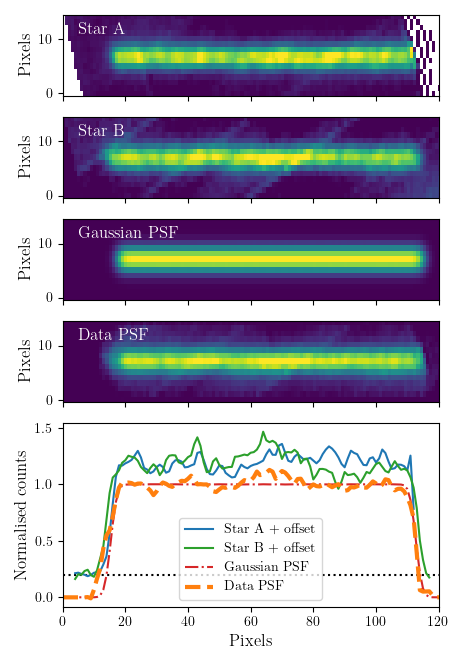

In [27]:
fig, axs = plt.subplot_mosaic('''
                               AA
                               BB
                               GG
                               DD
                               CC
                               CC
                               ''',
                              figsize=(1.4*fig_width,1*fig_width*2))
a = cal1[50-5:54+6]
a[a<.001] = np.nan
vmin = np.nanpercentile(a,16);vmax = np.nanpercentile(a,99)
axs['A'].imshow(a,origin='lower',vmin=vmin,vmax=vmax,cmap='viridis',aspect='auto')
#axs['A'].axhline(6.5,ls=':',c='w')
axs['A'].set_xlim(0,120)
axs['A'].set_xticklabels([])
axs['A'].set_ylabel('Pixels',fontsize=12)
axs['A'].text(5,11,s=r'Star A',color='white',weight=1000,fontsize=12)



b = cal2[50-5:54+6]
vmin = np.nanpercentile(b,16);vmax = np.nanpercentile(b,99)
axs['B'].imshow(b,origin='lower',vmin=vmin,vmax=vmax,cmap='viridis',aspect='auto')
axs['B'].set_xlim(0,120)
axs['B'].set_xticklabels([])
axs['B'].set_ylabel('Pixels',fontsize=12)
axs['B'].text(5,11,s=r'Star B',color='white',weight=1000,fontsize=12)

b = gauss1[50-5:54+6]
vmin = np.nanpercentile(b,16);vmax = np.nanpercentile(b,99)
axs['G'].imshow(b,origin='lower',vmin=vmin,vmax=vmax,cmap='viridis',aspect='auto')
axs['G'].set_xlim(0,120)
axs['G'].set_xticklabels([])
axs['G'].set_ylabel('Pixels',fontsize=12)
axs['G'].text(5,11,s=r'Gaussian PSF',color='white',weight=1000,fontsize=12)

b = d1[50-5:54+6]
vmin = np.nanpercentile(b,16);vmax = np.nanpercentile(b,99)
axs['D'].imshow(b,origin='lower',vmin=vmin,vmax=vmax,cmap='viridis',aspect='auto')
axs['D'].set_xlim(0,120)
axs['D'].set_xticklabels([])
axs['D'].set_ylabel('Pixels',fontsize=12)
axs['D'].text(5,11,s=r'Data PSF',color='white',weight=1000,fontsize=12)


axs['C'].axhline(.2,ls=':',c='k')
axs['C'].plot(s1+.2,c='C0',label='Star A + offset')
axs['C'].plot(s2+.2,c='C2',ls='-',label='Star B + offset')


axs['C'].plot(gauss,c='C3',ls='-.',label='Gaussian PSF')
axs['C'].plot(d,c='C1',ls='--',label='Data PSF',lw=3)

#axs['C'].plot(np.nanmedian(np.array([s1,s2]),axis=0))
#axs['C'].plot(d)
axs['C'].set_xlim(0,120)
axs['C'].set_ylabel('Normalised counts',fontsize=12)
axs['C'].set_xlabel('Pixels',fontsize=12)
axs['C'].legend()

#plt.subplots_adjust(hspace=-0.3)
#plt.subplots_adjust(wspace=0.2)
plt.tight_layout()
plt.savefig('scintillation_example_psfs.pdf',bbox_inches='tight')

In [26]:
data.cat

,_q,ra,dec,id,e_RA_ICRS,e_DE_ICRS,Plx,e_Plx,PM,pmRA,...,RAJ2000,DEJ2000,G_filt,x,y,xint,yint,fuzz,cal_source,containment
1,1,181.154258,-35.539830,3462487666351412864,0.1513,0.1086,0.9063,0.1975,3.787,-3.725,...,181.154278,-35.539833,GAIA/GAIA3.G,71.882610,272.033193,72,272,0,0,0.872463
5,1,181.142339,-35.539921,3462487872509843200,0.1518,0.1219,0.2846,0.2099,12.550,-9.241,...,181.142390,-35.539958,GAIA/GAIA3.G,246.455683,270.417634,246,270,0,1,0.972106
0,1,181.153862,-35.550521,3462487666351399296,0.2194,0.1747,0.4745,0.2930,4.458,-4.367,...,181.153885,-35.550517,GAIA/GAIA3.G,77.720561,79.585571,78,80,0,1,1.000000


In [175]:
xlims

10

In [142]:
data.psf.length_o

97.5193152462674

In [143]:
data.psf.length

97.5193152462674

<IPython.core.display.Javascript object>


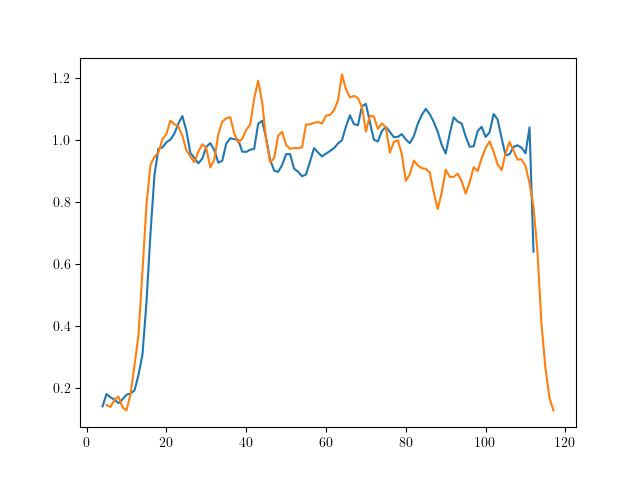

In [76]:
plt.figure()
plt.plot(s1)
plt.plot(s2)

<IPython.core.display.Javascript object>


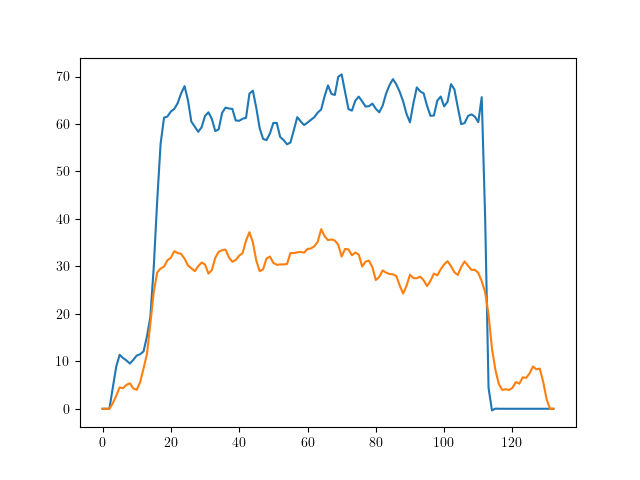

In [61]:
plt.figure()
plt.plot(np.nansum(cal1[50:55],axis=0))
plt.plot(np.nansum(cal2[50:55],axis=0))

<IPython.core.display.Javascript object>


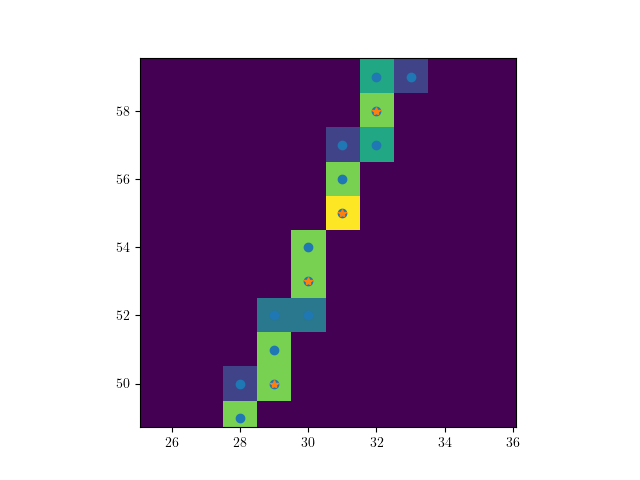

In [18]:
plt.figure()
plt.imshow(data.psf._linepsf,origin='lower')
plt.scatter(x,y)
plt.plot(xs,y_fit,'C1*')

In [18]:
data.psf.fit_pos(data.cal_cuts[2])
data_f,data_r = data.psf.psf_flux(data.cal_cuts[2])

gaussian.psf.fit_pos(data.cal_cuts[2])
gauss_f, gauss_r = gaussian.psf.psf_flux(data.cal_cuts[2])


moffat.psf.fit_pos(data.cal_cuts[2])
moffat_f, moffat_r = moffat.psf.psf_flux(data.cal_cuts[2])

<IPython.core.display.Javascript object>


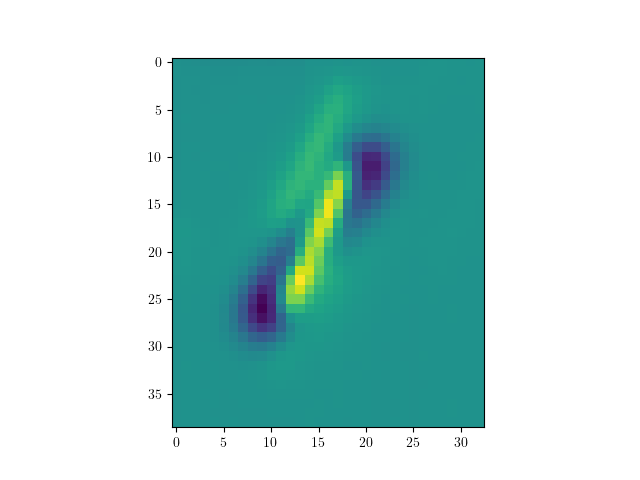

In [20]:
plt.figure()
plt.imshow(data_r)

Number of sources brighter than 25: 136
WCS shift:  [ 0.01749965 -0.06848009  0.17841571]
wcs shift:  [ 2.58933013e+01 -3.35646237e+00  2.63083561e-03]
Coords transformed
Calculating PSF coord shift
PSF shift:  [0. 0. 0.]


<IPython.core.display.Javascript object>


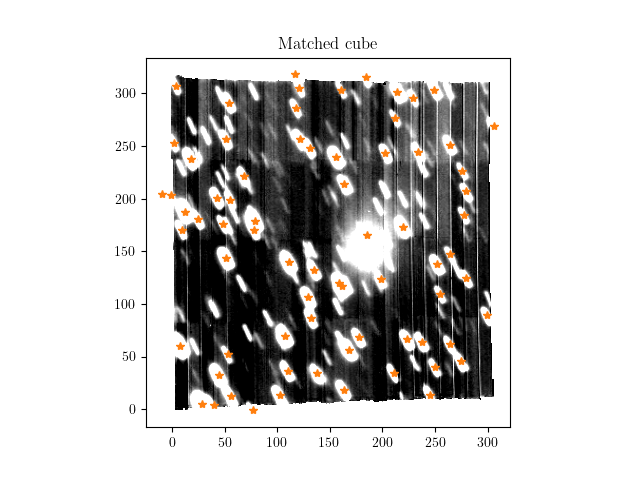

!!! Large difference of 0.46 between model_psf and data_psf!!!
Using the data_psf, override by setting psf_preference='model'
Made PSF
Exiting


In [9]:
data = starkiller(file='../2I_DATACUBE_FINAL_2020-03-19T05:46:49.016.fits',run=True,numcores=7,spec_catalog='ck',psf_profile='gaussian',plot=True,calc_psf_only=True)



<IPython.core.display.Javascript object>


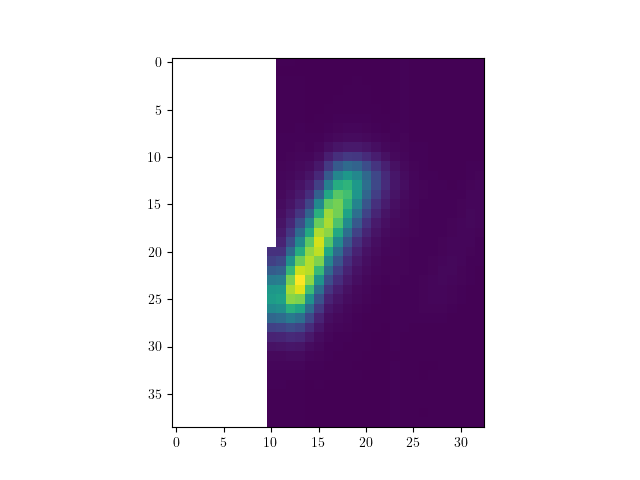

<IPython.core.display.Javascript object>


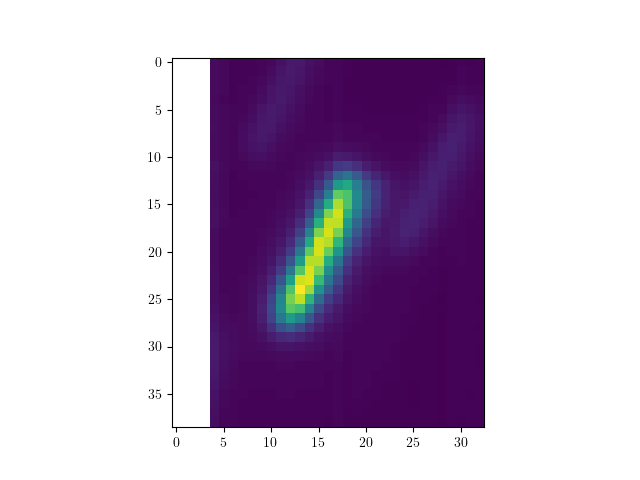

<IPython.core.display.Javascript object>


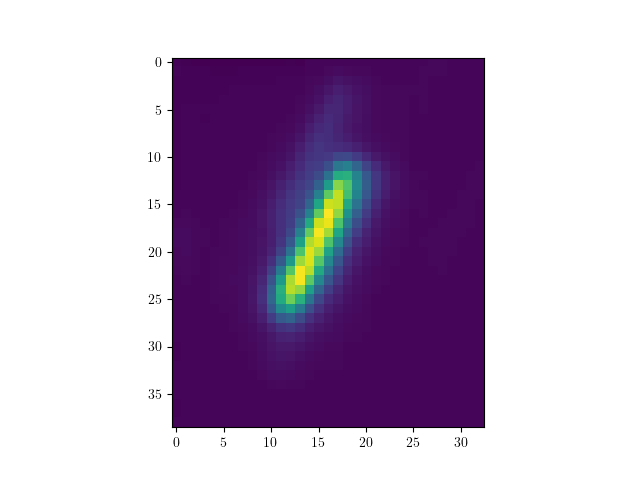

<IPython.core.display.Javascript object>


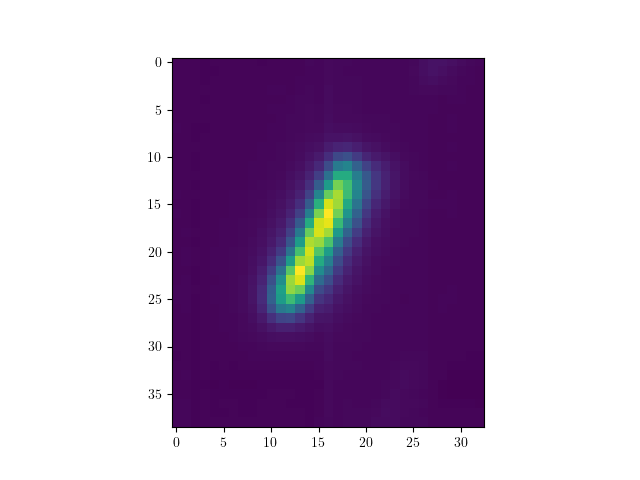

<IPython.core.display.Javascript object>


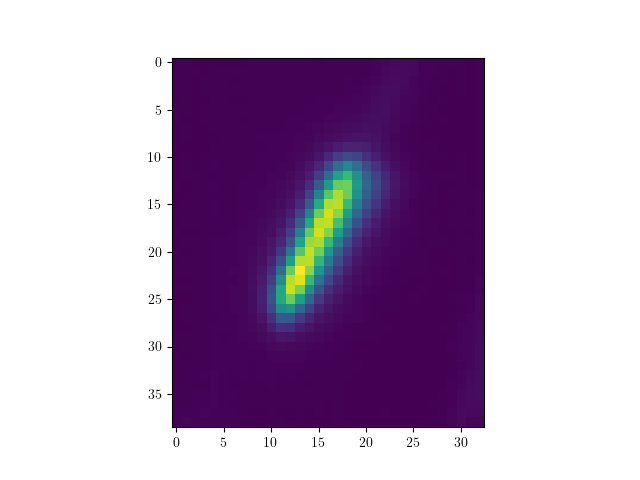

In [10]:
for c in data.cal_cuts:
    plt.figure()
    plt.imshow(c)


Calculating PSF coord shift
PSF shift:  [0. 0. 0.]


<IPython.core.display.Javascript object>


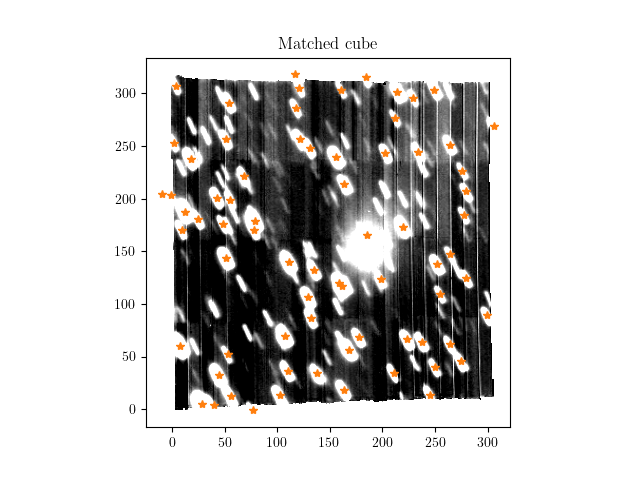

!!! Large difference of 0.46 between model_psf and data_psf!!!
Using the data_psf, override by setting psf_preference='model'


In [11]:
data.make_psf()

<IPython.core.display.Javascript object>


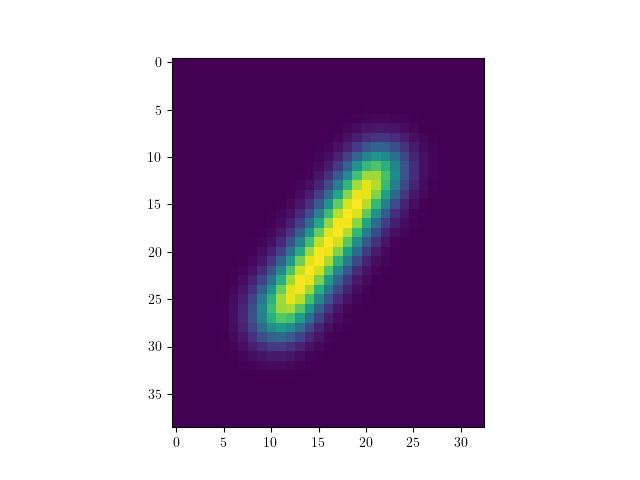

<IPython.core.display.Javascript object>


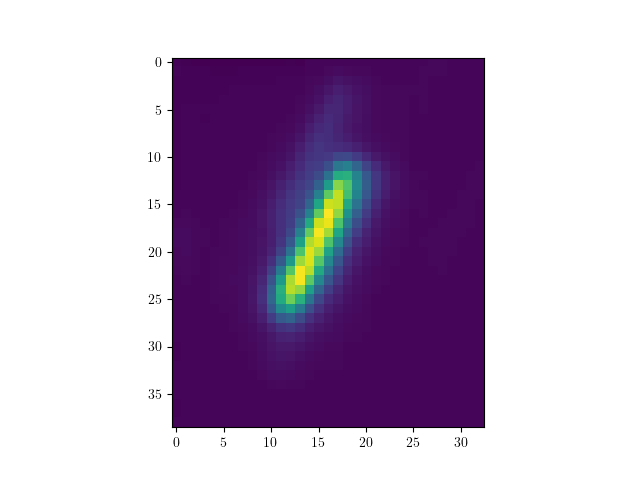

In [12]:
plt.figure()
plt.imshow(data.psf.longpsf)
plt.figure()
plt.imshow(data.cal_cuts[2])